In [166]:
import pandas as pd
import re



In [167]:
df_ar = pd.read_json("train/ar/train.jsonl", lines=True)
df_de = pd.read_json("train/de/train.jsonl", lines=True)
df_es = pd.read_json("train/es/train.jsonl", lines=True)
df_fr = pd.read_json("train/fr/train.jsonl", lines=True)
df_it = pd.read_json("train/it/train.jsonl", lines=True)
df_ja = pd.read_json("train/ja/train.jsonl", lines=True)

# Data Cleaning

dfs = [df_ar, df_de, df_es, df_fr, df_it, df_ja]

for df in dfs:
    # lowercase
    df["source"] = df["source"].str.lower()
    df["target"] = df["target"].str.lower()
    
    # remove punctuation (keeps Arabic/Japanese safe)
    df["source"] = df["source"].str.replace(r"[^\w\s]", "", regex=True)
    df["target"] = df["target"].str.replace(r"[^\w\s]", "", regex=True)
    
    # remove extra spaces
    df["source"] = df["source"].str.replace(r"\s+", " ", regex=True).str.strip()
    df["target"] = df["target"].str.replace(r"\s+", " ", regex=True).str.strip()


df_all = pd.concat([df_ar, df_de, df_es, df_fr, df_it, df_ja], ignore_index=True)

In [168]:
df_ar.head()

,id,source_locale,target_locale,source,target,entities,from
0,a9011ddf,en,ar,what is the seventh tallest mountain in north ...,ما سابع أعلى جبل في أمريكا الشمالية,[Q49],mintaka
1,2723bb1b,en,ar,which actor was the star of titanic and was bo...,من الممثل الذي لعب دور البطولة في فيلم تيتانيك...,"[Q44578, Q65]",mintaka
2,bff78c91,en,ar,what year was the first book of the a song of ...,في أي عام تم نشر أول كتاب من سلسلة أغنية الجلي...,[Q45875],mintaka
3,982450cf,en,ar,who is the youngest current us governor,من أصغر حاكم ولاية أمريكي حال,[Q889821],mintaka
4,217a0a84,en,ar,how long did it take to build the lincoln memo...,كم من الوقت استغرق بناء نصب لينكولن التذكاري,[Q213559],mintaka


In [169]:
df_de.head()

,id,source_locale,target_locale,source,target,entities,from
0,a9011ddf,en,de,what is the seventh tallest mountain in north ...,wie heißt der siebthöchste berg nordamerikas,[Q49],mintaka
1,bff78c91,en,de,what year was the first book of the a song of ...,in welchem jahr wurde das erste buch der reihe...,[Q45875],mintaka
2,982450cf,en,de,who is the youngest current us governor,wer ist derzeit der jüngste amerikanische gouv...,[Q889821],mintaka
3,b218d184,en,de,has bernie sanders ever been president of the ...,war bernie sanders jemals präsident der verein...,[Q30],mintaka
4,f477742c,en,de,which actor was stephenie meyers first choice ...,welcher schauspieler war stephanie meyers erst...,[Q160219],mintaka


In [170]:
df_es.head()

,id,source_locale,target_locale,source,target,entities,from
0,2723bb1b,en,es,which actor was the star of titanic and was bo...,qué actor protagonizó titanic y nació en los á...,[Q65],mintaka
1,bff78c91,en,es,what year was the first book of the a song of ...,en qué año se publicó el primer libro de la sa...,[Q45875],mintaka
2,fe541d01,en,es,which us president has had the most votes,qué presidente de estados unidos obtuvo más votos,[Q30],mintaka
3,217a0a84,en,es,how long did it take to build the lincoln memo...,en cuánto tiempo se construyó el monumento a l...,[Q213559],mintaka
4,b218d184,en,es,has bernie sanders ever been president of the ...,bernie sanders ha sido alguna vez presidente d...,[Q30],mintaka


In [171]:
df_fr.head()

,id,source_locale,target_locale,source,target,entities,from
0,a9011ddf,en,fr,what is the seventh tallest mountain in north ...,quelle est la septième plus haute montagne dam...,[Q49],mintaka
1,982450cf,en,fr,who is the youngest current us governor,qui est lactuel plus jeune gouverneur américain,[Q889821],mintaka
2,b218d184,en,fr,has bernie sanders ever been president of the ...,bernie sanders atil déjà été président des éta...,[Q30],mintaka
3,f477742c,en,fr,which actor was stephenie meyers first choice ...,quel acteur stephanie meyer atelle choisi en p...,[Q160219],mintaka
4,2e3cf745,en,fr,which river is longer than the mississippi river,quel fleuve est plus long que le mississippi,[Q1497],mintaka


In [172]:
df_it.head()

,id,source_locale,target_locale,source,target,entities,from
0,bff78c91,en,it,what year was the first book of the a song of ...,in che anno venne pubblicato il primo libro de...,[Q45875],mintaka
1,f477742c,en,it,which actor was stephenie meyers first choice ...,quale attore era stata la prima scelta di step...,[Q160219],mintaka
2,2e3cf745,en,it,which river is longer than the mississippi river,quale fiume è più lungo del mississippi,[Q1497],mintaka
3,650e81a3,en,it,what is the longest lake in the world,qual è il lago più lungo del mondo,[Q23397],mintaka
4,43aae58f,en,it,how many times have the los angeles dodgers lo...,quante volte i los angeles dodgers hanno perso...,[Q265538],mintaka


In [173]:
df_ja.head()

,id,source_locale,target_locale,source,target,entities,from
0,a9011ddf,en,ja,what is the seventh tallest mountain in north ...,北アメリカで七番目に高い山は何ですか,[Q49],mintaka
1,2723bb1b,en,ja,which actor was the star of titanic and was bo...,タイタニックのスターでカリフォルニア州ロサンゼルス生まれの俳優は誰ですか,"[Q44578, Q65]",mintaka
2,bff78c91,en,ja,what year was the first book of the a song of ...,氷と炎の歌シリーズの最初の本が出版された年は何年ですか,[Q45875],mintaka
3,982450cf,en,ja,who is the youngest current us governor,アメリカで現在最年少の知事は誰ですか,[Q889821],mintaka
4,217a0a84,en,ja,how long did it take to build the lincoln memo...,リンカーン記念堂を建てるのにどれくらい時間がかかりましたか,[Q213559],mintaka


### **Check for Null**

In [174]:
df_all.isnull().sum()

id               0
source_locale    0
target_locale    0
source           0
target           0
entities         0
from             0
dtype: int64

### **Check Data Stats**

In [182]:
df_all["source_len"] = df_all["source"].apply(lambda x: len(str(x).split()))
df_all["target_len"] = df_all["target"].apply(lambda x: len(str(x).split()))

df_all.groupby("target_locale")[["source_len", "target_len"]].describe()

source_len                                                   \
                   count       mean       std  min  25%   50%   75%   max   
target_locale                                                               
ar                7220.0  10.656787  3.610706  3.0  8.0  10.0  13.0  37.0   
de                4087.0  10.663567  3.605972  3.0  8.0  10.0  13.0  31.0   
es                5160.0  10.633140  3.670541  3.0  8.0  10.0  13.0  32.0   
fr                5531.0  10.711264  3.639642  3.0  8.0  10.0  13.0  37.0   
it                3739.0  10.618615  3.689317  3.0  8.0  10.0  13.0  32.0   
ja                7225.0  10.643460  3.646695  3.0  8.0  10.0  13.0  37.0   

              target_len                                                   
                   count       mean       std  min  25%   50%   75%   max  
target_locale                                                              
ar                7220.0  10.171053  3.677913  3.0  8.0  10.0  12.0  39.0  
de                4087.0   9.885980  3.462578  3.0  7.0   9.0  12.0  32.0  
es                5160.0  11.252326  4.099023  3.0  8.0  11.0  13.0  35.0  
fr                5531.0  11.755921  4.142980  3.0  9.0  11.0  14.0  40.0  
it                3739.0  10.898101  3.819642  2.0  8.0  10.0  13.0  32.0  
ja                7225.0   1.073633  0.407030  1.0  1.0   1.0   1.0  10.0

### **1. Sample Count Per Language**

C:\Users\KRESHNA\AppData\Local\Temp\ipykernel_27868\721059596.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_all, x="target_locale", palette=colors)


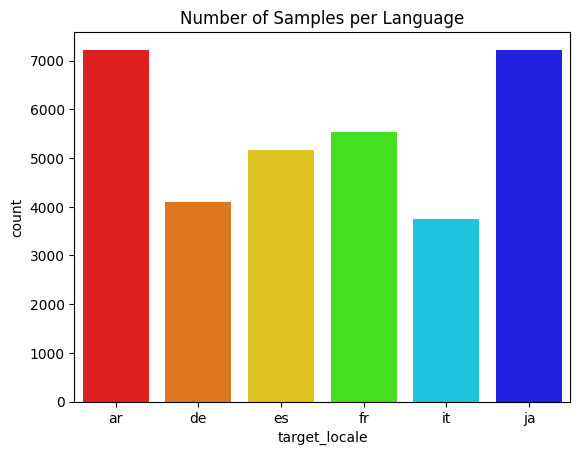

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#FF0000", "#FF7300", "#FFD900", "#33FF00", "#00D9FF", "#0400FF"]

sns.countplot(data=df_all, x="target_locale", palette=colors)
plt.title("Number of Samples per Language")
plt.show()

### **2. Appearance of Samples across Languages**

In [177]:
lang_count_per_id = df_all.groupby("id")["target_locale"].nunique()
lang_count_per_id.value_counts()


target_locale
2    2169
3    2074
4    1619
5    1411
1    1317
6    1259
Name: count, dtype: int64

C:\Users\KRESHNA\AppData\Local\Temp\ipykernel_27868\518179969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


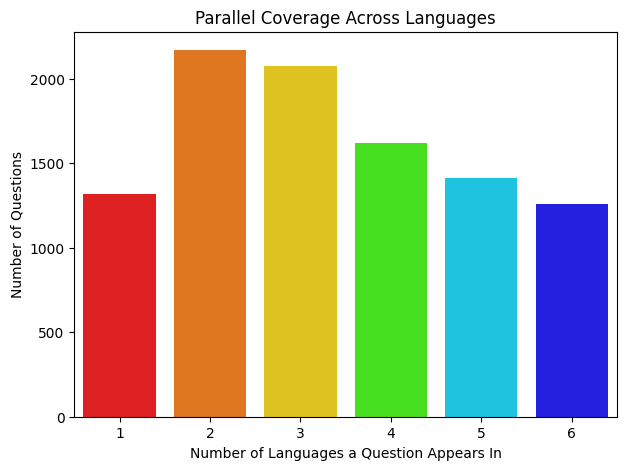

In [178]:
lang_dist = lang_count_per_id.value_counts().sort_index().reset_index()
lang_dist.columns = ["num_languages", "num_questions"]

plt.figure(figsize=(7,5))
sns.barplot(
    data=lang_dist,
    x="num_languages",
    y="num_questions",
    palette=colors
)

plt.xlabel("Number of Languages a Question Appears In")
plt.ylabel("Number of Questions")
plt.title("Parallel Coverage Across Languages")
plt.show()


### **3. Sentence Length Analysis**

C:\Users\KRESHNA\AppData\Local\Temp\ipykernel_27868\1061780952.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="target_locale", y="source_len", palette=colors)


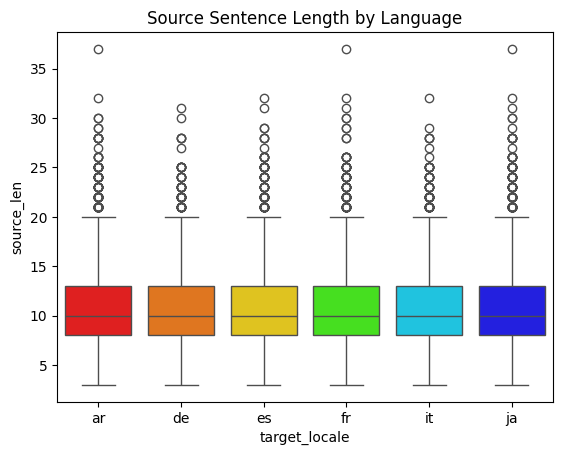

C:\Users\KRESHNA\AppData\Local\Temp\ipykernel_27868\1061780952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="target_locale", y="target_len", palette=colors)


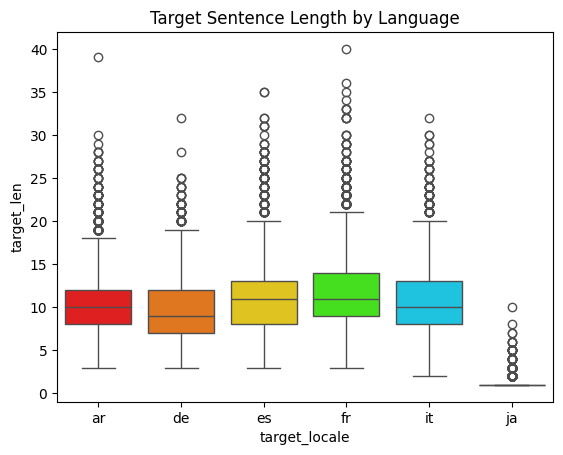

In [179]:
sns.boxplot(data=df_all, x="target_locale", y="source_len", palette=colors)
plt.title("Source Sentence Length by Language")
plt.show()

sns.boxplot(data=df_all, x="target_locale", y="target_len", palette=colors)
plt.title("Target Sentence Length by Language")
plt.show()


### **4. Sentence Length Scatter Plot**

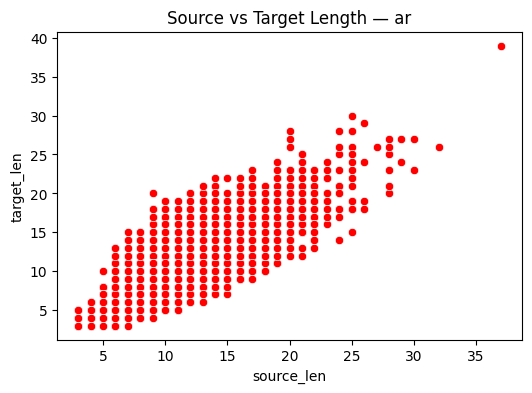

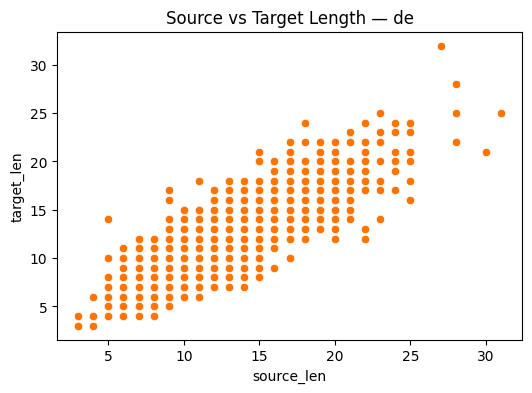

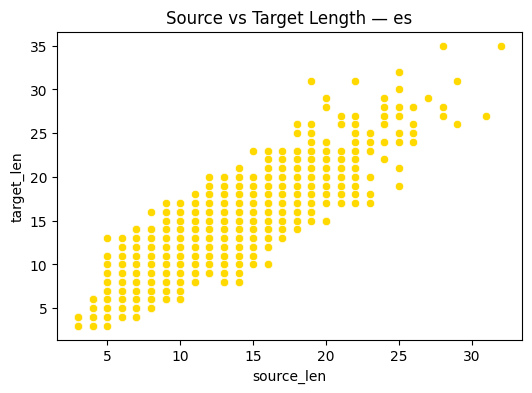

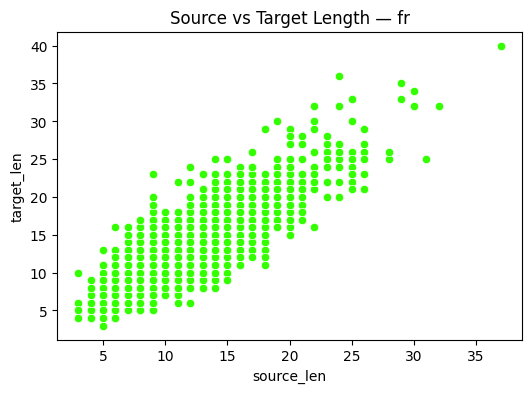

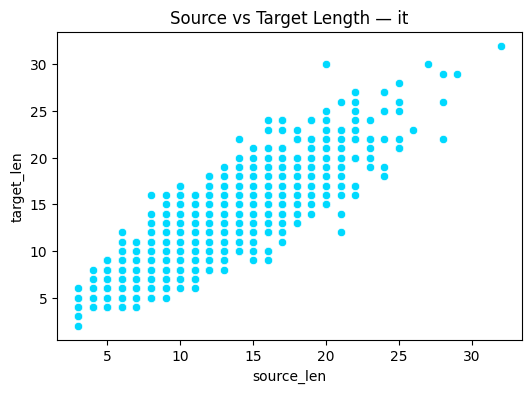

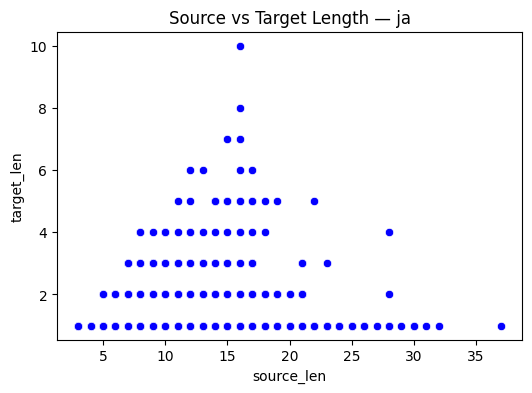

In [180]:
langs = df_all["target_locale"].unique()
color_map = {lang: colors[i] for i, lang in enumerate(langs)}

for lang in df_all["target_locale"].unique():
    subset = df_all[df_all["target_locale"] == lang]
    
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        data=subset,
        x="source_len",
        y="target_len",
        color=color_map[lang]
    )
    plt.title(f"Source vs Target Length — {lang}")
    plt.show()


Japanese sentences appear much shorter in our length analysis because Japanese text does not use whitespace to separate words. Therefore, our word-count metric heavily underestimates Japanese token length.

### **5. Character Length Analysis**

We initially analyzed sentence length using word counts but observed that Japanese sentences appeared to have a length of one. This is because Japanese does not use whitespace to mark word boundaries, making word-count methods unreliable for multilingual analysis.

Therefore, we switched to character-based sentence length, which provides a fair and consistent comparison across all languages.

C:\Users\KRESHNA\AppData\Local\Temp\ipykernel_27868\4234267132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


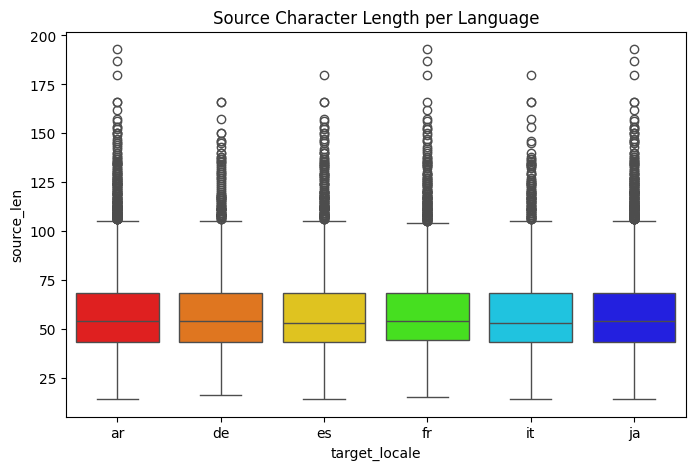

C:\Users\KRESHNA\AppData\Local\Temp\ipykernel_27868\4234267132.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


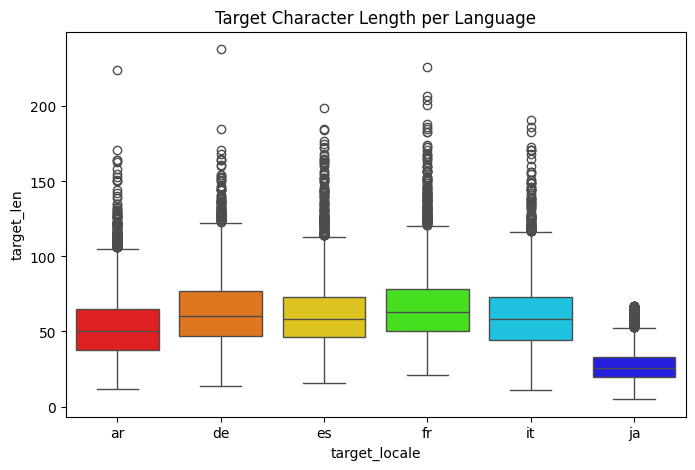

In [183]:
df_all["source_len"] = df_all["source"].str.len()
df_all["target_len"] = df_all["target"].str.len()


plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_all,
    x="target_locale",
    y="source_len",
    palette=colors
)
plt.title("Source Character Length per Language")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_all,
    x="target_locale",
    y="target_len",
    palette=colors
)
plt.title("Target Character Length per Language")
plt.show()


### **6. Character Length Scatter Plot**

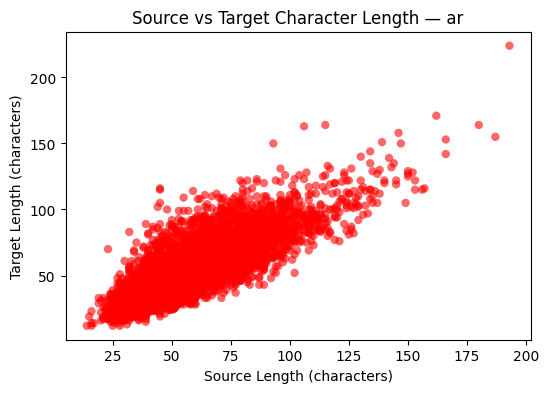

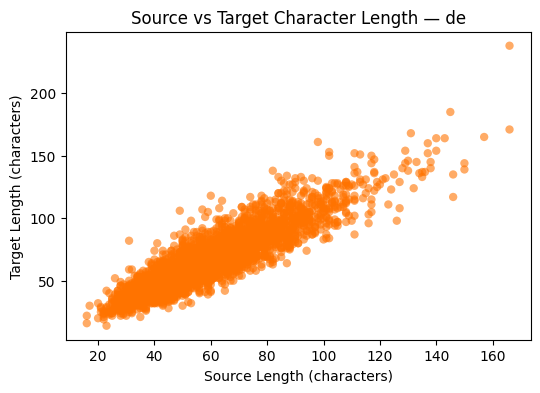

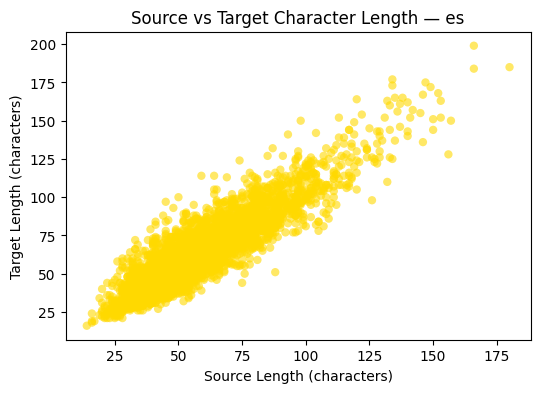

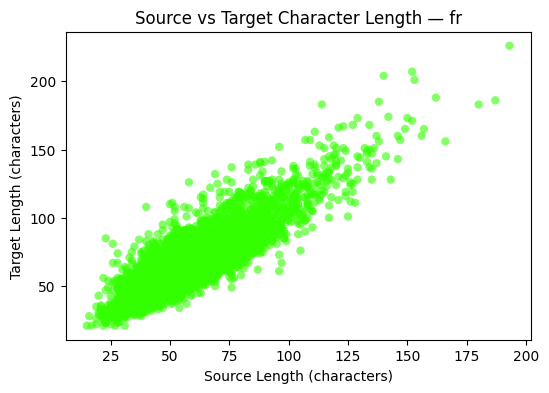

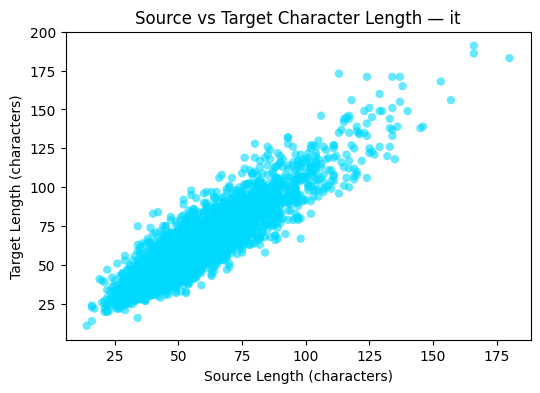

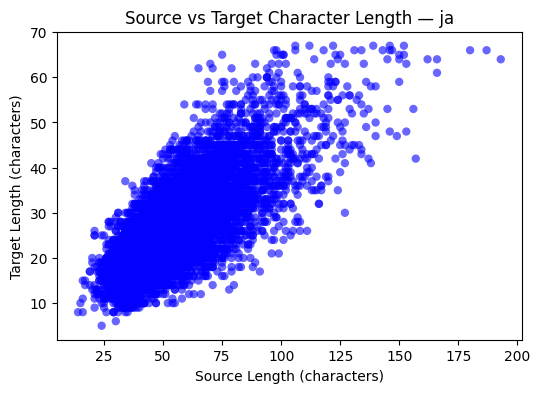

In [185]:
for lang in df_all["target_locale"].unique():
    subset = df_all[df_all["target_locale"] == lang]
    
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        data=subset,
        x="source_len",
        y="target_len",
        color=color_map[lang],
        alpha=0.6,
        edgecolor="none"
    )
    plt.title(f"Source vs Target Character Length — {lang}")
    plt.xlabel("Source Length (characters)")
    plt.ylabel("Target Length (characters)")
    plt.show()

### **7. Most Common Words**

In [ ]:
from collections import Counter
import itertools

def top_words(df, column="target", n=20):
    words = list(itertools.chain.from_iterable(df[column].str.split()))
    return Counter(words).most_common(n)

for lang in df_all["target_locale"].unique():
    print("\nLanguage:", lang)
    print(top_words(df_all[df_all["target_locale"] == lang], "target"))



Language: ar
[('في', 3378), ('من', 3147), ('ما', 2106), ('هو', 1356), ('التي', 1172), ('هل', 1151), ('عدد', 1133), ('المتحدة', 972), ('أي', 966), ('الذي', 947), ('كم', 943), ('هي', 918), ('الولايات', 691), ('كان', 643), ('عام', 494), ('أكبر', 474), ('لم', 470), ('الأمريكية', 470), ('أم', 458), ('فيلم', 454)]

Language: de
[('der', 2509), ('die', 1306), ('in', 1103), ('ist', 1005), ('von', 766), ('wer', 764), ('war', 742), ('hat', 714), ('wie', 689), ('welcher', 563), ('welches', 505), ('und', 500), ('das', 490), ('den', 463), ('viele', 399), ('wurde', 393), ('oder', 365), ('des', 349), ('im', 341), ('nicht', 338)]

Language: es
[('de', 4420), ('el', 2693), ('la', 2491), ('en', 2016), ('qué', 1402), ('es', 1220), ('más', 1210), ('los', 1118), ('cuál', 1060), ('quién', 1001), ('fue', 999), ('del', 972), ('estados', 757), ('unidos', 701), ('y', 601), ('que', 551), ('se', 522), ('no', 504), ('a', 479), ('cuántos', 456)]

Language: fr
[('de', 3874), ('le', 3119), ('la', 2922), ('quel', 154